### SOT Final Model - Running Average of the HST_f data used to better mirror real world prediction info availability

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  


%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Python Analysis\\Leagues_SOT_DF_Prepared.csv', index_col=[0])

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HS_f_Av,AS_f_Av,HS_a_Av,AS_a_Av,HS_Lg_Av,AS_Lg_Av,HST,AST,HST_f_Av,AST_f_Av,HST_a_Av,AST_a_Av,HST_Lg_Av,AST_Lg_Av,TG,TST,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,21/08/2021,Inter,Genoa,4,0,17.0,11.0,19.79,9.53,9.95,15.26,14.02,11.87,8.0,5.0,8.05,3.00,3.32,5.21,4.69,4.19,4,13.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
1,I1,21/08/2021,Verona,Sassuolo,2,3,12.0,15.0,12.26,14.47,11.95,15.84,14.02,11.87,4.0,8.0,4.53,5.63,4.58,5.21,4.69,4.19,5,12.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,I1,21/08/2021,Empoli,Lazio,1,3,16.0,8.0,14.26,10.11,16.58,13.42,14.02,11.87,5.0,5.0,4.84,4.84,6.37,4.00,4.69,4.19,4,10.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
3,I1,21/08/2021,Torino,Atalanta,1,2,19.0,6.0,14.00,14.37,10.05,11.26,14.02,11.87,8.0,2.0,4.58,4.16,3.58,3.47,4.69,4.19,3,10.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
4,I1,22/08/2021,Bologna,Salernitana,3,2,18.0,8.0,11.84,10.53,11.84,16.79,14.02,11.87,7.0,4.0,3.79,3.89,4.26,6.37,4.69,4.19,5,11.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS',
       'HS_f_Av', 'AS_f_Av', 'HS_a_Av', 'AS_a_Av', 'HS_Lg_Av', 'AS_Lg_Av',
       'HST', 'AST', 'HST_f_Av', 'AST_f_Av', 'HST_a_Av', 'AST_a_Av',
       'HST_Lg_Av', 'AST_Lg_Av', 'TG', 'TST', 'HW_%', 'X_%', 'AW_%', 'Ov2.5_%',
       'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19360 entries, 0 to 19359
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Div        19360 non-null  object 
 1   Date       19360 non-null  object 
 2   HomeTeam   19360 non-null  object 
 3   AwayTeam   19360 non-null  object 
 4   FTHG       19360 non-null  int64  
 5   FTAG       19360 non-null  int64  
 6   HS         19356 non-null  float64
 7   AS         19356 non-null  float64
 8   HS_f_Av    19360 non-null  float64
 9   AS_f_Av    19360 non-null  float64
 10  HS_a_Av    19360 non-null  float64
 11  AS_a_Av    19360 non-null  float64
 12  HS_Lg_Av   19360 non-null  float64
 13  AS_Lg_Av   19360 non-null  float64
 14  HST        19356 non-null  float64
 15  AST        19356 non-null  float64
 16  HST_f_Av   19360 non-null  float64
 17  AST_f_Av   19360 non-null  float64
 18  HST_a_Av   19360 non-null  float64
 19  AST_a_Av   19360 non-null  float64
 20  HST_Lg

In [6]:
df.describe()

,FTHG,FTAG,HS,AS,HS_f_Av,AS_f_Av,HS_a_Av,AS_a_Av,HS_Lg_Av,AS_Lg_Av,HST,AST,HST_f_Av,AST_f_Av,HST_a_Av,AST_a_Av,HST_Lg_Av,AST_Lg_Av,TG,TST,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,19360.000000,19360.000000,19356.000000,19356.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19356.000000,19356.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19360.000000,19356.000000,19359.00000,19359.000000,19359.000000,19358.000000,19358.000000,19082.000000,19082.000000,19082.000000,19082.000000
mean,1.533523,1.225413,13.194565,10.902253,13.194347,10.902459,10.902533,13.194926,13.194777,10.902384,4.805848,3.985173,4.805720,3.985323,3.985125,4.805856,4.805957,3.984570,2.758936,8.791021,0.43915,0.249001,0.311845,0.520381,0.479619,2.759235,1.554627,1.204552,0.350075
std,1.313667,1.181899,5.283614,4.693725,2.658097,2.211641,2.196498,2.509673,1.111662,0.857322,2.634297,2.360450,1.250509,1.040499,0.926248,1.032984,0.429681,0.371048,1.672344,3.257816,0.18677,0.051216,0.170324,0.090375,0.090375,0.361443,0.592468,0.528111,1.062559
min,0.000000,0.000000,0.000000,0.000000,6.530000,5.870000,4.570000,6.400000,10.180000,8.500000,0.000000,0.000000,2.190000,1.840000,1.420000,1.950000,3.900000,3.430000,0.000000,0.000000,0.03000,0.050000,0.020000,0.280000,0.140000,1.840000,0.250000,0.240000,-3.110000
25%,1.000000,0.000000,9.000000,8.000000,11.420000,9.420000,9.370000,11.470000,12.660000,10.410000,3.000000,2.000000,3.890000,3.260000,3.370000,4.110000,4.560000,3.720000,2.000000,6.000000,0.31000,0.220000,0.190000,0.450000,0.420000,2.470000,1.160000,0.850000,-0.250000
50%,1.000000,1.000000,13.000000,10.000000,12.840000,10.530000,10.890000,13.180000,13.380000,11.140000,4.000000,4.000000,4.580000,3.790000,3.950000,4.820000,4.730000,3.870000,3.000000,9.000000,0.43000,0.260000,0.290000,0.510000,0.490000,2.710000,1.450000,1.100000,0.340000
75%,2.000000,2.000000,16.000000,14.000000,14.630000,12.110000,12.380000,14.950000,14.020000,11.550000,6.000000,5.000000,5.420000,4.530000,4.532500,5.530000,4.960000,4.140000,4.000000,11.000000,0.56000,0.290000,0.400000,0.580000,0.550000,3.030000,1.870000,1.450000,0.980000
max,10.000000,13.000000,46.000000,45.000000,25.150000,19.710000,18.290000,23.470000,15.380000,12.250000,19.000000,23.000000,9.940000,8.240000,7.210000,8.260000,6.190000,5.230000,13.000000,25.000000,0.92000,0.460000,0.890000,0.860000,0.720000,3.820000,3.570000,3.400000,3.320000


In [7]:
df=df[['Date', 'HomeTeam', 'AwayTeam', 'HST', 'AST', 'HST_Lg_Av', 'AST_Lg_Av', 'HG_Exp', 'AG_Exp']]


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Convert 'Date' column to datetime

# ______________________________________________________________________________

In [9]:
# Create df 2020 for season 2020-2021

# Define the start and end dates of your range
start_date = pd.to_datetime('20/08/2020', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2021', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2020 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2020 = df_2020.reset_index(drop=True)


In [10]:
df_2020

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp
0,2020-09-19,Fiorentina,Torino,8.0,3.0,5.65,4.94,1.79,1.00
1,2020-09-19,Verona,Roma,7.0,7.0,5.65,4.94,1.06,1.73
2,2020-09-20,Parma,Napoli,2.0,7.0,5.65,4.94,0.93,2.13
3,2020-09-20,Genoa,Crotone,8.0,5.0,5.65,4.94,1.69,1.00
4,2020-09-20,Sassuolo,Cagliari,10.0,4.0,5.65,4.94,1.91,1.19
...,...,...,...,...,...,...,...,...,...
2929,2021-04-18,Oostende,Cercle Brugge,5.0,5.0,4.75,4.30,2.07,0.87
2930,2021-04-18,Oud-Heverlee Leuven,Waasland-Beveren,2.0,9.0,4.75,4.30,2.13,1.28
2931,2021-04-18,St Truiden,Anderlecht,1.0,4.0,4.75,4.30,0.81,1.92
2932,2021-04-18,Standard,Beerschot VA,10.0,3.0,4.75,4.30,2.12,0.91


In [11]:
# adds column and evaluates the running HST_f value
df_2020['R_Av_HST_f'] = round(df_2020.groupby('HomeTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2020['R_Av_AST_f'] = round(df_2020.groupby('AwayTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2020['R_Av_HST_a'] = round(df_2020.groupby('HomeTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2020['R_Av_AST_a'] = round(df_2020.groupby('AwayTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)


# _______________________________________________________________________________

In [12]:
# Create df 2019 for season 2019-2020

# Define the start and end dates of your range
start_date = pd.to_datetime('10/08/2019', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2020', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2019 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2019 = df_2019.reset_index(drop=True)


In [13]:
df_2019

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp
0,2019-08-24,Parma,Juventus,4.0,4.0,6.19,5.23,0.52,2.34
1,2019-08-24,Fiorentina,Napoli,6.0,6.0,6.19,5.23,0.92,1.87
2,2019-08-25,Udinese,Milan,6.0,0.0,6.19,5.23,0.98,1.49
3,2019-08-25,Cagliari,Brescia,5.0,3.0,6.19,5.23,1.69,0.88
4,2019-08-25,Roma,Genoa,9.0,4.0,6.19,5.23,2.14,0.70
...,...,...,...,...,...,...,...,...,...
2170,2020-03-07,Kortrijk,Antwerp,4.0,5.0,4.92,4.09,1.26,1.50
2171,2020-03-07,Mechelen,Eupen,8.0,1.0,4.92,4.09,2.04,0.72
2172,2020-03-07,Mouscron,Waasland-Beveren,6.0,1.0,4.92,4.09,1.56,1.15
2173,2020-03-07,Oostende,Genk,4.0,8.0,4.92,4.09,1.21,1.73


In [14]:
# adds column and evaluates the running HST_f value
df_2019['R_Av_HST_f'] = round(df_2019.groupby('HomeTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2019['R_Av_AST_f'] = round(df_2019.groupby('AwayTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2019['R_Av_HST_a'] = round(df_2019.groupby('HomeTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2019['R_Av_AST_a'] = round(df_2019.groupby('AwayTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)


# ____________________________________________________________________________

In [15]:
# Create df 2018 for season 2018-2019

# Define the start and end dates of your range
start_date = pd.to_datetime('10/08/2018', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2019', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2018 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2018 = df_2018.reset_index(drop=True)


In [16]:
# adds column and evaluates the running HST_f value
df_2018['R_Av_HST_f'] = round(df_2018.groupby('HomeTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2018['R_Av_AST_f'] = round(df_2018.groupby('AwayTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2018['R_Av_HST_a'] = round(df_2018.groupby('HomeTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2018['R_Av_AST_a'] = round(df_2018.groupby('AwayTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)


In [17]:
df_2018

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,R_Av_HST_f,R_Av_AST_f,R_Av_HST_a,R_Av_AST_a
0,2018-08-18,Chievo,Juventus,2.0,11.0,5.74,4.74,0.44,2.50,NaN,NaN,NaN,NaN
1,2018-08-18,Lazio,Napoli,5.0,6.0,5.74,4.74,1.40,1.54,NaN,NaN,NaN,NaN
2,2018-08-19,Bologna,Spal,3.0,5.0,5.74,4.74,1.31,0.98,NaN,NaN,NaN,NaN
3,2018-08-19,Empoli,Cagliari,4.0,5.0,5.74,4.74,1.42,1.05,NaN,NaN,NaN,NaN
4,2018-08-19,Parma,Udinese,6.0,6.0,5.74,4.74,1.27,1.13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,2019-03-17,Lokeren,Cercle Brugge,5.0,3.0,5.54,4.73,1.58,1.21,4.31,4.31,7.23,5.62
2658,2019-03-17,Oostende,Anderlecht,2.0,7.0,5.54,4.73,0.94,2.05,5.08,3.85,5.62,5.54
2659,2019-03-17,St Truiden,Gent,6.0,6.0,5.54,4.73,1.32,1.98,5.54,6.38,4.38,5.77
2660,2019-03-17,Standard,Waasland-Beveren,11.0,5.0,5.54,4.73,2.64,0.52,6.92,4.54,4.38,6.62


# ___________________________________________________________________________________-

In [18]:
# Create df 2017 for season 2017-2018

# Define the start and end dates of your range
start_date = pd.to_datetime('10/08/2017', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2018', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2017 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2017 = df_2017.reset_index(drop=True)


In [19]:
# adds column and evaluates the running HST_f value
df_2017['R_Av_HST_f'] = round(df_2017.groupby('HomeTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2017['R_Av_AST_f'] = round(df_2017.groupby('AwayTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2017['R_Av_HST_a'] = round(df_2017.groupby('HomeTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2017['R_Av_AST_a'] = round(df_2017.groupby('AwayTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)


In [20]:
df_2017.head(50)

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,R_Av_HST_f,R_Av_AST_f,R_Av_HST_a,R_Av_AST_a
0,2017-08-19,Juventus,Cagliari,7.0,2.0,4.84,3.9,2.79,0.35,NaN,NaN,NaN,NaN
1,2017-08-19,Verona,Napoli,4.0,12.0,4.84,3.9,0.70,2.36,NaN,NaN,NaN,NaN
2,2017-08-20,Atalanta,Roma,6.0,1.0,4.84,3.9,1.25,1.59,NaN,NaN,NaN,NaN
3,2017-08-20,Bologna,Torino,3.0,3.0,4.84,3.9,1.13,1.40,NaN,NaN,NaN,NaN
4,2017-08-20,Crotone,Milan,2.0,10.0,4.84,3.9,0.82,2.04,NaN,NaN,NaN,NaN
5,2017-08-20,Inter,Fiorentina,6.0,3.0,4.84,3.9,2.10,0.79,NaN,NaN,NaN,NaN
6,2017-08-20,Lazio,Spal,13.0,2.0,4.84,3.9,2.48,0.54,NaN,NaN,NaN,NaN
7,2017-08-20,Sampdoria,Benevento,6.0,7.0,4.84,3.9,1.83,0.79,NaN,NaN,NaN,NaN
8,2017-08-20,Sassuolo,Genoa,3.0,4.0,4.84,3.9,1.53,1.11,NaN,NaN,NaN,NaN
9,2017-08-20,Udinese,Chievo,5.0,3.0,4.84,3.9,1.43,0.95,NaN,NaN,NaN,NaN


# _____________________________________________________________________

In [21]:
# Create df 2016 for season 2016-2017

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2016', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2017', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2016 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2016 = df_2016.reset_index(drop=True)

In [22]:
# adds column and evaluate the running HST_f value
df_2016['R_Av_HST_f'] = round(df_2016.groupby('HomeTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2016['R_Av_AST_f'] = round(df_2016.groupby('AwayTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2016['R_Av_HST_a'] = round(df_2016.groupby('HomeTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2016['R_Av_AST_a'] = round(df_2016.groupby('AwayTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)


In [23]:
df_2016.head(50)

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,R_Av_HST_f,R_Av_AST_f,R_Av_HST_a,R_Av_AST_a
0,2016-08-20,Juventus,Fiorentina,4.0,1.0,5.19,4.14,1.93,0.63,NaN,NaN,NaN,NaN
1,2016-08-20,Roma,Udinese,9.0,1.0,5.19,4.14,2.16,0.68,NaN,NaN,NaN,NaN
2,2016-08-21,Atalanta,Lazio,6.0,6.0,5.19,4.14,1.09,1.28,NaN,NaN,NaN,NaN
3,2016-08-21,Bologna,Crotone,6.0,0.0,5.19,4.14,1.47,0.78,NaN,NaN,NaN,NaN
4,2016-08-21,Chievo,Inter,4.0,3.0,5.19,4.14,0.92,1.41,NaN,NaN,NaN,NaN
5,2016-08-21,Empoli,Sampdoria,3.0,5.0,5.19,4.14,1.33,1.04,NaN,NaN,NaN,NaN
6,2016-08-21,Genoa,Cagliari,6.0,3.0,5.19,4.14,1.54,1.00,NaN,NaN,NaN,NaN
7,2016-08-21,Milan,Torino,5.0,4.0,5.19,4.14,1.64,0.89,NaN,NaN,NaN,NaN
8,2016-08-21,Palermo,Sassuolo,2.0,8.0,5.19,4.14,1.11,1.26,NaN,NaN,NaN,NaN
9,2016-08-21,Pescara,Napoli,3.0,4.0,5.19,4.14,0.66,2.23,NaN,NaN,NaN,NaN


# _________________________________________________________________________________

In [24]:
# Create df 2015 for season 2015-2016

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2015', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2016', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2015 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2015 = df_2015.reset_index(drop=True)


In [25]:
# adds column and evaluates the running HST_f value
df_2015['R_Av_HST_f'] = round(df_2015.groupby('HomeTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2015['R_Av_AST_f'] = round(df_2015.groupby('AwayTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2015['R_Av_HST_a'] = round(df_2015.groupby('HomeTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2015['R_Av_AST_a'] = round(df_2015.groupby('AwayTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)


In [26]:
df_2015

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,R_Av_HST_f,R_Av_AST_f,R_Av_HST_a,R_Av_AST_a
0,2015-08-22,Lazio,Bologna,9.0,4.0,4.63,3.69,2.06,0.65,NaN,NaN,NaN,NaN
1,2015-08-22,Verona,Roma,7.0,8.0,4.63,3.69,0.82,1.84,NaN,NaN,NaN,NaN
2,2015-08-23,Empoli,Chievo,5.0,3.0,4.63,3.69,1.35,0.94,NaN,NaN,NaN,NaN
3,2015-08-23,Fiorentina,Milan,7.0,0.0,4.63,3.69,1.54,1.09,NaN,NaN,NaN,NaN
4,2015-08-23,Frosinone,Torino,3.0,7.0,4.63,3.69,0.96,1.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2016-05-14,Kilmarnock,Dundee United,6.0,10.0,4.66,4.05,1.49,1.40,2.88,4.12,5.12,5.24
2019,2016-05-14,Partick,Hamilton,6.0,3.0,4.66,4.05,1.49,1.27,4.18,3.41,4.29,4.94
2020,2016-05-15,Aberdeen,Ross County,3.0,5.0,4.66,4.05,2.08,0.88,4.24,4.06,3.12,4.06
2021,2016-05-15,Celtic,Motherwell,17.0,1.0,4.66,4.05,2.92,0.54,8.24,3.76,2.88,4.65


# __________________________________________________________________________________________

In [27]:
# Create df 2014 for season 2014-2015

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2014', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2015', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2014 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2014 = df_2014.reset_index(drop=True)

In [28]:
# adds column and evaluates the running HST_f value
df_2014['R_Av_HST_f'] = round(df_2014.groupby('HomeTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2014['R_Av_AST_f'] = round(df_2014.groupby('AwayTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2014['R_Av_HST_a'] = round(df_2014.groupby('HomeTeam')['AST'].apply(lambda x: x.shift().expanding().mean()),2)
df_2014['R_Av_AST_a'] = round(df_2014.groupby('AwayTeam')['HST'].apply(lambda x: x.shift().expanding().mean()),2)


In [29]:
df_2014

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,R_Av_HST_f,R_Av_AST_f,R_Av_HST_a,R_Av_AST_a
0,2014-08-16,Arsenal,Crystal Palace,6.0,2.0,4.72,3.68,2.43,0.46,NaN,NaN,NaN,NaN
1,2014-08-16,Leicester,Everton,3.0,3.0,4.72,3.68,1.16,1.40,NaN,NaN,NaN,NaN
2,2014-08-16,Man United,Swansea,5.0,4.0,4.72,3.68,2.33,0.56,NaN,NaN,NaN,NaN
3,2014-08-16,QPR,Hull,6.0,4.0,4.72,3.68,1.24,1.08,NaN,NaN,NaN,NaN
4,2014-08-16,Stoke,Aston Villa,2.0,2.0,4.72,3.68,1.49,0.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2015-05-23,Kilmarnock,Ross County,4.0,9.0,4.75,3.85,1.26,1.55,4.71,3.83,4.65,5.94
1659,2015-05-23,Motherwell,Partick,4.0,5.0,4.75,3.85,1.28,1.51,4.24,3.56,4.24,4.06
1660,2015-05-24,Aberdeen,St Johnstone,7.0,1.0,4.75,3.85,1.59,0.96,5.39,2.83,3.56,4.78
1661,2015-05-24,Celtic,Inverness C,5.0,0.0,4.75,3.85,2.59,0.54,7.72,3.82,2.44,3.06


# ___________________________________________________________________________________

### Combine all the seasons into df_comb

In [30]:
years = [df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]
df_comb = pd.concat(years, axis=0)
df_comb

,Date,HomeTeam,AwayTeam,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,R_Av_HST_f,R_Av_AST_f,R_Av_HST_a,R_Av_AST_a
0,2014-08-16,Arsenal,Crystal Palace,6.0,2.0,4.72,3.68,2.43,0.46,NaN,NaN,NaN,NaN
1,2014-08-16,Leicester,Everton,3.0,3.0,4.72,3.68,1.16,1.40,NaN,NaN,NaN,NaN
2,2014-08-16,Man United,Swansea,5.0,4.0,4.72,3.68,2.33,0.56,NaN,NaN,NaN,NaN
3,2014-08-16,QPR,Hull,6.0,4.0,4.72,3.68,1.24,1.08,NaN,NaN,NaN,NaN
4,2014-08-16,Stoke,Aston Villa,2.0,2.0,4.72,3.68,1.49,0.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2021-04-18,Oostende,Cercle Brugge,5.0,5.0,4.75,4.30,2.07,0.87,4.60,3.33,3.53,4.67
2930,2021-04-18,Oud-Heverlee Leuven,Waasland-Beveren,2.0,9.0,4.75,4.30,2.13,1.28,4.47,3.27,6.33,6.20
2931,2021-04-18,St Truiden,Anderlecht,1.0,4.0,4.75,4.30,0.81,1.92,3.27,3.93,4.33,3.87
2932,2021-04-18,Standard,Beerschot VA,10.0,3.0,4.75,4.30,2.12,0.91,4.60,4.07,4.33,4.80


In [31]:
#drop rows with nulls
df_comb.isna().sum()

Date            0
HomeTeam        0
AwayTeam        0
HST             1
AST             1
HST_Lg_Av       0
AST_Lg_Av       0
HG_Exp        242
AG_Exp        242
R_Av_HST_f    896
R_Av_AST_f    896
R_Av_HST_a    896
R_Av_AST_a    896
dtype: int64

In [32]:
df_comb.dropna(axis=0,inplace=True)

In [33]:
df_comb.isna().sum()

Date          0
HomeTeam      0
AwayTeam      0
HST           0
AST           0
HST_Lg_Av     0
AST_Lg_Av     0
HG_Exp        0
AG_Exp        0
R_Av_HST_f    0
R_Av_AST_f    0
R_Av_HST_a    0
R_Av_AST_a    0
dtype: int64

In [34]:
df_comb.describe()

,HST,AST,HST_Lg_Av,AST_Lg_Av,HG_Exp,AG_Exp,R_Av_HST_f,R_Av_AST_f,R_Av_HST_a,R_Av_AST_a
count,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000,14339.000000
mean,4.779204,3.979915,4.818533,3.978752,1.557960,1.199036,4.765964,3.980252,3.995628,4.800528
std,2.581426,2.337093,0.434960,0.379362,0.592822,0.526871,1.563724,1.338281,1.276863,1.438843
min,0.000000,0.000000,3.900000,3.430000,0.280000,0.240000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.620000,3.690000,1.160000,0.850000,3.730000,3.000000,3.170000,3.940000
50%,4.000000,4.000000,4.750000,3.860000,1.450000,1.090000,4.500000,3.820000,3.930000,4.750000
75%,6.000000,5.000000,5.020000,4.120000,1.870000,1.440000,5.600000,4.710000,4.710000,5.600000
max,18.000000,23.000000,6.190000,5.230000,3.570000,3.400000,19.000000,14.000000,14.000000,19.000000


### Observe best correlated features

In [35]:
df_comb.corr()['HST'].sort_values()

AG_Exp       -0.331809
AST          -0.139738
R_Av_HST_a   -0.107605
R_Av_AST_f   -0.093490
AST_Lg_Av     0.139323
HST_Lg_Av     0.157151
R_Av_AST_a    0.185062
R_Av_HST_f    0.288793
HG_Exp        0.441774
HST           1.000000
Name: HST, dtype: float64

### Train and Test to model the data for HST

In [36]:
#Split data separating the independent and target variables
y_data = df_comb['HST']
X_data = df_comb[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'HST_Lg_Av', 'AST_Lg_Av', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']]

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=1)
print('number of test samples :', x_test.shape[0])
print('number of training samples :', x_train.shape[0])

number of test samples : 3585
number of training samples : 10754


In [38]:
# using all features

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'HST_Lg_Av', 'AST_Lg_Av', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']],y_train)
x = lr.score(x_test[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'HST_Lg_Av', 'AST_Lg_Av', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']],y_test)

print('The R-Square is: ', x)
print(lr.intercept_)
print(lr.coef_)

The R-Square is:  0.208005541886639
-1.2547874788047988
[ 1.69472474  0.06440975  0.04079723  0.59700194  0.03686161  0.00851274
 -0.02039622 -0.07801432]


In [39]:
# remove lg_Av as a feature

from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=1)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']],y_train)
x = lr1.score(x_test[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']],y_test)

print('The R-Square is: ', x)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.2030061967462018
0.5866877050235146
[1.76826021 0.11252353 0.10315758 0.05462924 0.0356227  0.03158297]


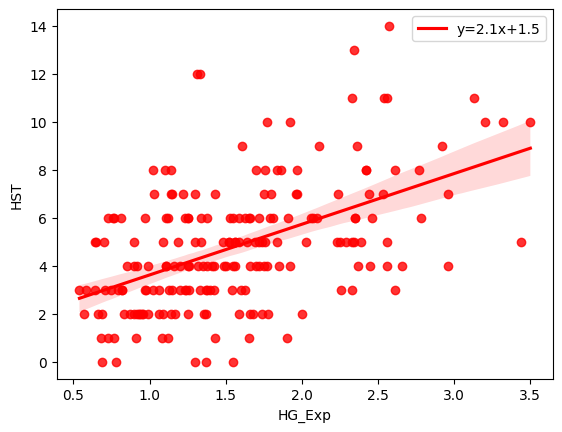

In [40]:
# observe the distribution of HG_Exp to HST with a random sample size allocated

df_sample = df_comb.sample(n=200)
from scipy import stats
# plot the % split vs Sup for all matches
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sample['HG_Exp'],df_sample['HST'])

# use line_kws to set line label for legend
ax = sns.regplot(x="HG_Exp", y="HST", data=df_sample, color='red', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

### Check for linearity of the data - polynomial better??

In [41]:
# relationship may be non-linear - ploynomial transform of HG_Exp and then R_Av_HST_f (vs HST)

from sklearn.preprocessing import PolynomialFeatures

n=3 # degree variable

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,3.5)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HST')
    
    plt.show()
    plt.close()
    
X = df_comb['HG_Exp']
y = df_comb['HST']  

f = np.polyfit(X,y,n) # 4d Polynomial decided on by trial and error of the resulting R^2
p = np.poly1d(f)
print(p)

         3          2
-0.1577 x + 0.7932 x + 0.762 x + 2.268


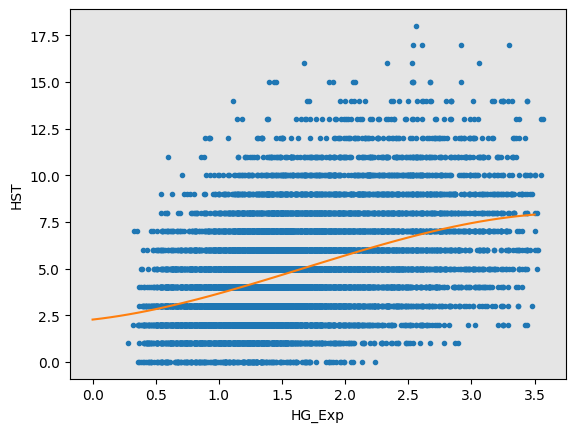

In [42]:
PlotPolly(p,X,y,'HG_Exp')

In [43]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.1958770034885412


In [44]:
n=3 # degree variable

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,12)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HST')
    
    plt.show()
    plt.close()
    
X = df_comb['R_Av_HST_f']
y = df_comb['HST']  

f = np.polyfit(X,y,n) # 4d Polynomial decided on by trial and error of the resulting R^2
p = np.poly1d(f)
print(p)

           3          2
-0.008729 x + 0.1712 x - 0.5131 x + 4.198


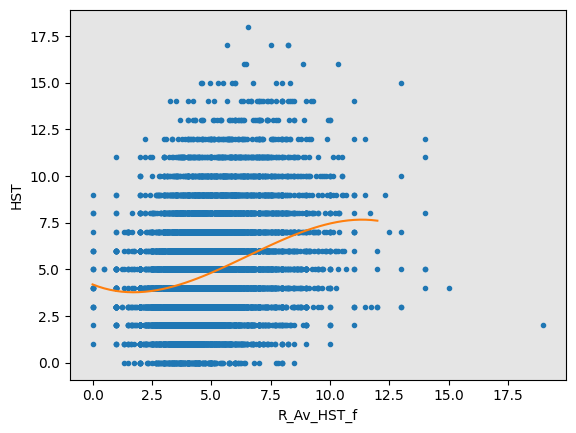

In [45]:
PlotPolly(p,X,y,'R_Av_HST_f')

In [46]:
r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.08959968429918252


*** R2 scores do not indicate any improved relationship with polynomial fit over linear ***

# ______________________________________________________________________________

### Repeat for AST using all features of linear model which gave the best R2

In [47]:
#Split our data separating the independent and target variables
y_data = df_comb['AST']
X_data = df_comb[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'HST_Lg_Av', 'AST_Lg_Av', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']]

In [48]:
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=1)
lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'HST_Lg_Av', 'AST_Lg_Av', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']],y_train)
x = lr.score(x_test[['HG_Exp', 'R_Av_HST_f', 'R_Av_AST_a', 'HST_Lg_Av', 'AST_Lg_Av', 'R_Av_AST_f', 'R_Av_HST_a', 'AG_Exp']],y_test)

print('The R-Square is: ', x)
print(lr.intercept_)
print(lr.coef_)

The R-Square is:  0.19782481831281873
-0.9263988527743368
[ 0.0489887   0.03401061 -0.02796174  0.04947989  0.47709127  0.02459644
  0.10986394  1.7709311 ]
